# A look at the joint likelihood ratio and joint score

In [24]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *
from simulation.population_sim import SubhaloSimulator

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

In [25]:
theta_train = np.load("../data/samples/theta_train.npy")
x_train = np.load("../data/samples/x_train.npy")
y_train = np.load("../data/samples/y_train.npy")
t_xz_train = np.load("../data/samples/t_xz_train.npy")
r_xz_train = np.load("../data/samples/r_xz_train.npy")
log_r_xz_train = np.load("../data/samples/log_r_xz_train.npy")
n_subs_train = np.load("../data/samples/n_subs_train.npy")

## Plot augmented data vs n_subs

In [26]:
log_r_xz_train.shape

(10000,)

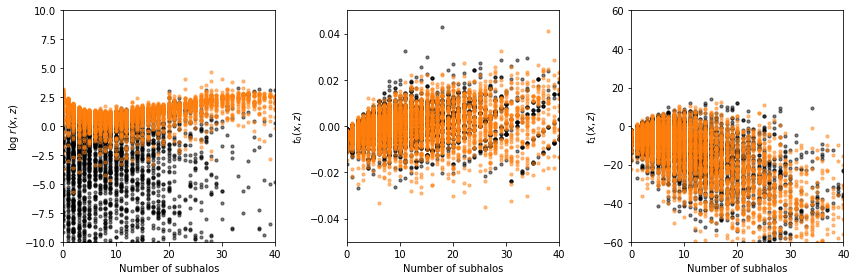

In [42]:
skip = 1
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
plt.scatter(n_subs_train[y_train==1][::skip], (log_r_xz_train[y_train==1][::skip]), alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], (log_r_xz_train[y_train==0][::skip]), alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$\log \; r(x,z)$")
plt.xlim(0.,40.)
plt.ylim(-10,10.)

ax = plt.subplot(1,3,2)
plt.scatter(n_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 0], alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 0], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_0(x,z)$")
plt.xlim(0.,40.)
plt.ylim(-.05,.05)

ax = plt.subplot(1,3,3)
plt.scatter(n_subs_train[y_train==1][::skip], t_xz_train[y_train==1][::skip, 1], alpha=0.5, s=10., c='black')
plt.scatter(n_subs_train[y_train==0][::skip], t_xz_train[y_train==0][::skip, 1], alpha=0.5, s=10., c='C1')
plt.xlabel("Number of subhalos")
plt.ylabel(r"$t_1(x,z)$")
plt.xlim(0.,40.)
plt.ylim(-60.,60.)

plt.tight_layout()
plt.savefig("../figures/gold.pdf")

In [28]:
np.mean(np.exp(-log_r_xz_train[y_train==0]))

0.6770326111107281

In [29]:
np.mean(np.exp(log_r_xz_train[y_train==1]))

0.9992191963249374

In [44]:
np.mean(t_xz_train[y_train==0][:,0])

9.237672708104783e-05

In [45]:
np.mean(t_xz_train[y_train==0][:,1])

-28.970717032178875

In [46]:
np.mean(t_xz_train[y_train==1][:,0])

0.00018469935353512037

In [47]:
np.mean(t_xz_train[y_train==1][:,1])

-18.757904560227814